In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")


In [82]:
data=pd.read_csv('wdbc.data',header=None)

data.head()

In [83]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

In [85]:
data.to_csv('labeledData.csv',header=headers,index=False)

In [86]:
data=pd.read_csv('labeledData.csv')
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
def diag(z):
    if z=='M':
        return 1
    else:
        return 0
z=data['diagnosis'].apply(diag)
data.diagnosis=z

In [88]:
df=pd.DataFrame(data=data)
df=df.drop('id',axis=1)
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [89]:
x_scaled=x.apply(zscore)
x_scaled.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [90]:
from sklearn.model_selection import train_test_split
random_state=42
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=random_state)

In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

c_values = np.arange(0, 1, 0.001)
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=ftwo_scorer, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.959207 using {'C': 0.08600000000000001, 'kernel': 'linear'}


In [92]:
best_model = grid_result.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [93]:
best_model.score(x_test,y_test)

0.9824561403508771

Confusion Matrix


<Axes: >

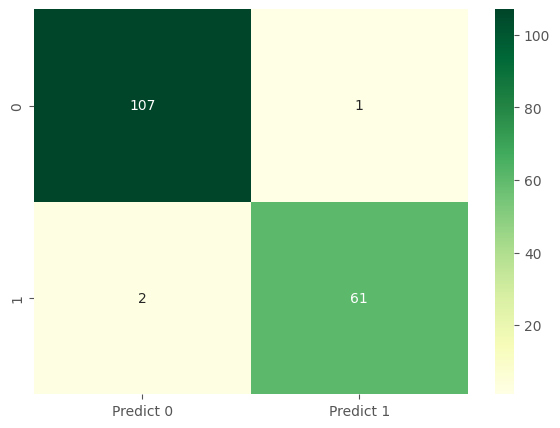

In [94]:
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')

In [95]:
false_negatives=np.logical_and(y_test!=y_pred,y_pred==0)
x_test[false_negatives]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489


In [96]:
true_negatives=np.logical_and(y_test==y_pred,y_pred==0)
x_test[true_negatives]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403
81,-0.223602,-0.798102,-0.225682,-0.383638,0.814113,0.931636,0.352803,0.540406,0.476015,0.882089,...,-0.153073,-0.405029,-0.315766,-0.467048,0.930698,1.430264,1.024806,0.855640,1.013126,0.978321
477,-0.064554,-0.621245,-0.123531,-0.157817,-1.998346,-0.969387,-0.835650,-0.916438,0.005043,-1.054359,...,-0.233835,-0.631382,-0.180538,-0.284225,-1.688935,-0.341385,-0.641853,-0.797664,-0.358752,-0.386016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,-1.035883,-1.002884,-1.008296,-0.913779,0.128078,-0.057631,-0.319515,-0.689709,0.413949,0.900517,...,-0.857154,-0.668836,-0.770000,-0.773804,0.014527,0.288394,0.104162,-0.327467,0.192911,0.693484
69,-0.382650,-0.651497,-0.436576,-0.433410,0.138753,-0.985496,-0.656240,-0.523080,-0.809117,-0.888499,...,-0.581734,-0.963583,-0.643112,-0.572523,-0.121364,-1.168303,-0.807368,-0.849434,-0.837615,-1.099772
542,0.174018,1.426574,0.112489,0.038995,-0.968582,-0.610256,-0.599491,-0.481036,0.103619,-0.850224,...,0.049868,1.076850,0.004134,-0.095249,-1.155891,-0.742153,-0.532950,-0.077750,-0.289188,-0.797202
176,-1.199475,-0.286147,-1.127336,-1.002515,0.044814,0.474905,0.526062,-0.303315,-0.520693,2.603060,...,-1.037316,-0.209616,-1.018414,-0.862051,-0.099446,0.259131,0.366586,-0.236107,-0.463908,1.787392


In [97]:
frames=[x_test[false_negatives],x_test[true_negatives]]
pred_neg=pd.concat(frames)
pred_neg

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,-1.035883,-1.002884,-1.008296,-0.913779,0.128078,-0.057631,-0.319515,-0.689709,0.413949,0.900517,...,-0.857154,-0.668836,-0.770000,-0.773804,0.014527,0.288394,0.104162,-0.327467,0.192911,0.693484
69,-0.382650,-0.651497,-0.436576,-0.433410,0.138753,-0.985496,-0.656240,-0.523080,-0.809117,-0.888499,...,-0.581734,-0.963583,-0.643112,-0.572523,-0.121364,-1.168303,-0.807368,-0.849434,-0.837615,-1.099772
542,0.174018,1.426574,0.112489,0.038995,-0.968582,-0.610256,-0.599491,-0.481036,0.103619,-0.850224,...,0.049868,1.076850,0.004134,-0.095249,-1.155891,-0.742153,-0.532950,-0.077750,-0.289188,-0.797202
176,-1.199475,-0.286147,-1.127336,-1.002515,0.044814,0.474905,0.526062,-0.303315,-0.520693,2.603060,...,-1.037316,-0.209616,-1.018414,-0.862051,-0.099446,0.259131,0.366586,-0.236107,-0.463908,1.787392


In [98]:
stacks=[y_test[false_negatives],y_test[true_negatives]]
y_labels=np.hstack(stacks)
y_labels.shape


(109,)

In [99]:
new_df=pd.DataFrame(data=pred_neg)
new_df['diagnosis']=y_labels
new_df.shape
new_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension,diagnosis
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903,1
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489,1
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958,0
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440,0
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403,0


In [100]:
new_df['diagnosis'].value_counts()

diagnosis
0    107
1      2
Name: count, dtype: int64

In [101]:
x_new=new_df.drop(['diagnosis'],axis=1)
y_new=new_df.diagnosis
y_new.value_counts()

diagnosis
0    107
1      2
Name: count, dtype: int64

In [102]:
x_new.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
540,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,...,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403


In [103]:
y_new.head()

73     1
255    1
204    0
431    0
540    0
Name: diagnosis, dtype: int64

In [104]:
new_df_corr=new_df.corr()['diagnosis'].abs().sort_values(ascending=False)
new_df_corr

diagnosis                  1.000000
worst_perimeter            0.235689
worst_area                 0.235283
worst_concave points       0.232660
worst_compactness          0.232604
worst_radius               0.224669
mean_compactness           0.221599
mean_concave points        0.204002
mean_concavity             0.187766
worst_concavity            0.159166
mean_perimeter             0.158140
mean_area                  0.148552
mean_radius                0.144178
worst_fractal dimension    0.142694
worst_smoothness           0.140869
SE_area                    0.120454
mean_smoothness            0.111543
SE_texture                 0.110737
SE_symmetry                0.085283
SE_smoothness              0.076597
SE_radius                  0.068206
worst_texture              0.057493
mean_texture               0.055602
SE_concave points          0.053502
SE_perimeter               0.048240
SE_compactness             0.028635
SE_fractal dimension       0.028533
worst_symmetry             0

In [105]:
features=new_df_corr[new_df_corr>0.2].index.to_list()[1:]
features

['worst_perimeter',
 'worst_area',
 'worst_concave points',
 'worst_compactness',
 'worst_radius',
 'mean_compactness',
 'mean_concave points']

In [106]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        x = [f for f in features if f != feature]        
        x, y = df[x], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(x, y).score(x, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(new_df,features)

,VIF,Tolerance
worst_perimeter,70.406682,0.014203
worst_area,83.467869,0.011981
worst_concave points,7.223867,0.138430
worst_compactness,7.000164,0.142854
worst_radius,104.431167,0.009576
mean_compactness,5.570267,0.179525
mean_concave points,6.135508,0.162986


In [107]:
features=['worst_concave points','worst_compactness','mean_compactness','mean_concave points']
calculate_vif(new_df,features)

,VIF,Tolerance
worst_concave points,6.495456,0.153954
worst_compactness,5.557820,0.179927
mean_compactness,5.234693,0.191033
mean_concave points,5.916933,0.169006


In [108]:
features=['worst_compactness','worst_radius']
calculate_vif(new_df,features)

,VIF,Tolerance
worst_compactness,1.174807,0.851204
worst_radius,1.174807,0.851204


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.1,random_state=42)

In [110]:
best_model = grid_result.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
best_model.score(x_test,y_test)

1.0

Confusion Matrix


<Axes: >

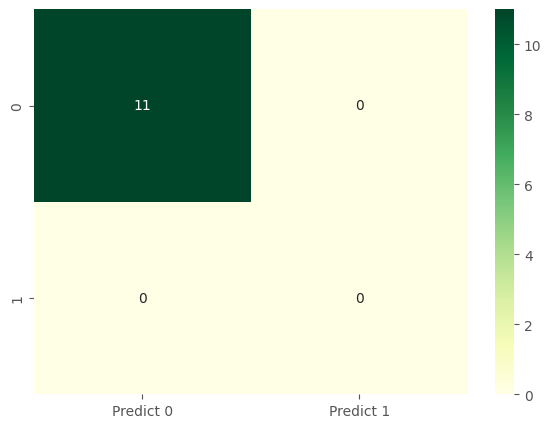

In [111]:
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')